In [3]:
pip install paddlepaddle


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 6.5 MB/s eta 0:00:00
  Attempting uninstall: opt-einsum
    Found existing installation: opt_einsum 3.4.0
    Uninstalling opt_einsum-3.4.0:
      Successfully uninstalled opt_einsum-3.4.0


Original Image:


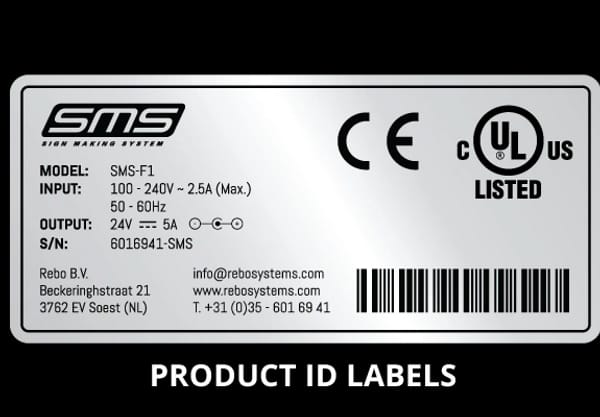


Extracting text from image...
download https://paddleocr.bj.bcebos.com/dygraph_v2.0/ch/ch_ppocr_mobile_v2.0_cls_infer.tar to /root/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer/ch_ppocr_mobile_v2.0_cls_infer.tar


100%|██████████| 2138/2138 [00:16<00:00, 127.72it/s]

[2024/11/27 14:28:24] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_c

[2024/11/27 14:28:25] ppocr DEBUG: dt_boxes num : 20, elapsed : 0.22237443923950195
[2024/11/27 14:28:25] ppocr DEBUG: cls num  : 20, elapsed : 0.07612895965576172
[2024/11/27 14:28:26] ppocr DEBUG: rec_res num  : 20, elapsed : 1.065563440322876

Extracted Information:


,Model,Input,Output,S/N,Website,Phone,Email
0,SMS-F1,100-240V~2.5AMax.,24V5AC,6016941-SMS,www.rebosystems.com,T.+31035-6016941,info@rebosystems.com



Data saved to product_label_data.xlsx


In [5]:
# Cell 2: Import required libraries
import os
from paddleocr import PaddleOCR
import pandas as pd
from IPython.display import Image, display
import re

# Cell 3: Display the image
print("Original Image:")
display(Image('/content/WhatsApp Image 2024-11-15 at 13.36.09_cd91dc0d.jpg'))  # Replace with your image path

# Cell 4: Initialize PaddleOCR and perform text extraction
def clean_text(text):
    """Clean extracted text by removing extra spaces and special characters"""
    return ' '.join(text.strip().split())

def extract_label_info(image_path):
    # Initialize PaddleOCR
    ocr = PaddleOCR(use_angle_cls=True, lang='en')

    # Perform OCR on the image
    result = ocr.ocr(image_path, cls=True)

    # Initialize dictionary to store the required fields
    label_data = {
        'Model': '',
        'Input': '',
        'Output': '',
        'S/N': '',
        'Website': '',
        'Phone': '',
        'Email': ''
    }

    if result:
        # First pass: collect all text lines
        all_lines = []
        for line in result[0]:
            text = clean_text(line[1][0])
            all_lines.append(text)

        # Process each line
        for i, text in enumerate(all_lines):
            text_upper = text.upper()

            # Generic field extraction using regex and label detection
            # Model extraction
            if 'MODEL' in text_upper or 'MODEL:' in text_upper:
                value = text.split(':', 1)[1].strip() if ':' in text else ''
                if value:
                    label_data['Model'] = value
                elif i + 1 < len(all_lines):  # Check next line if current line only contains label
                    label_data['Model'] = clean_text(all_lines[i + 1])

            # Input extraction
            if 'INPUT' in text_upper or 'INPUT:' in text_upper:
                value = text.split(':', 1)[1].strip() if ':' in text else ''
                if value:
                    label_data['Input'] = value
                elif i + 1 < len(all_lines):
                    label_data['Input'] = clean_text(all_lines[i + 1])

            # Output extraction
            if 'OUTPUT' in text_upper or 'OUTPUT:' in text_upper:
                value = text.split(':', 1)[1].strip() if ':' in text else ''
                if value:
                    label_data['Output'] = value
                elif i + 1 < len(all_lines):
                    label_data['Output'] = clean_text(all_lines[i + 1])

            # Serial Number extraction
            if any(s in text_upper for s in ['S/N:', 'S/N', 'SERIAL', 'SERIAL NUMBER']):
                value = text.split(':', 1)[1].strip() if ':' in text else ''
                if value:
                    label_data['S/N'] = value
                elif i + 1 < len(all_lines):
                    label_data['S/N'] = clean_text(all_lines[i + 1])

            # Website extraction
            if 'www.' in text.lower():
                label_data['Website'] = clean_text(text)

            # Phone extraction
            phone_pattern = re.compile(r'(?:Tel|T|Phone|P)?(?:[:.]?)?\s*(?:\+\d+[0-9\-\s\.]+)')
            if phone_pattern.search(text):
                phone = phone_pattern.search(text).group(0)
                label_data['Phone'] = clean_text(phone)

            # Email extraction
            email_pattern = re.compile(r'[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}')
            if email_pattern.search(text):
                email = email_pattern.search(text).group(0)
                label_data['Email'] = clean_text(email)

    return label_data

# Cell 5: Process the image and create DataFrame
image_path = '/content/WhatsApp Image 2024-11-15 at 13.36.09_cd91dc0d.jpg'   # Replace with your image path

try:
    print("\nExtracting text from image...")
    extracted_data = extract_label_info(image_path)

    # Create DataFrame with specific columns
    df = pd.DataFrame([extracted_data])

    # Display the extracted information
    print("\nExtracted Information:")
    display(df)

    # Save to Excel with better formatting
    output_path = 'product_label_data.xlsx'

    # Create a Excel writer object
    with pd.ExcelWriter(output_path, engine='openpyxl') as writer:
        df.to_excel(writer, index=False)

        # Auto-adjust column widths
        worksheet = writer.sheets['Sheet1']
        for idx, col in enumerate(df.columns):
            max_length = max(df[col].astype(str).apply(len).max(),
                           len(col))
            worksheet.column_dimensions[chr(65 + idx)].width = max_length + 2

    print(f"\nData saved to {output_path}")

except Exception as e:
    print(f"An error occurred: {str(e)}")